<a href="https://colab.research.google.com/github/rimshaharmaen/EDA-Hotel-Booking-Analysis/blob/main/Rimsha_Harmaen_Hotel_Booking.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Have you ever wondered when the best time of year to book a hotel room is? Or the optimal length of stay in order to get the best daily rate? What if you wanted to predict whether or not a hotel was likely to receive a disproportionately high number of special requests? This hotel booking dataset can help you explore those questions!**
# **This data set contains booking information for a city hotel and a resort hotel, and includes information such as when the booking was made, length of stay, the number of adults, children, and/or babies, and the number of available parking spaces, among other things. All personally identifying information has been removed from the data.**

# **Explore and analyze the data to discover important factors that govern the bookings.**


In [1]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [2]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

In [3]:
df=pd.read_csv("/content/drive/MyDrive/Almabetter/Hotel Bookings.csv")

In [5]:
df.shape

(119390, 32)

In [6]:
df.columns

Index(['hotel', 'is_canceled', 'lead_time', 'arrival_date_year',
       'arrival_date_month', 'arrival_date_week_number',
       'arrival_date_day_of_month', 'stays_in_weekend_nights',
       'stays_in_week_nights', 'adults', 'children', 'babies', 'meal',
       'country', 'market_segment', 'distribution_channel',
       'is_repeated_guest', 'previous_cancellations',
       'previous_bookings_not_canceled', 'reserved_room_type',
       'assigned_room_type', 'booking_changes', 'deposit_type', 'agent',
       'company', 'days_in_waiting_list', 'customer_type', 'adr',
       'required_car_parking_spaces', 'total_of_special_requests',
       'reservation_status', 'reservation_status_date'],
      dtype='object')

In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 119390 entries, 0 to 119389
Data columns (total 32 columns):
 #   Column                          Non-Null Count   Dtype  
---  ------                          --------------   -----  
 0   hotel                           119390 non-null  object 
 1   is_canceled                     119390 non-null  int64  
 2   lead_time                       119390 non-null  int64  
 3   arrival_date_year               119390 non-null  int64  
 4   arrival_date_month              119390 non-null  object 
 5   arrival_date_week_number        119390 non-null  int64  
 6   arrival_date_day_of_month       119390 non-null  int64  
 7   stays_in_weekend_nights         119390 non-null  int64  
 8   stays_in_week_nights            119390 non-null  int64  
 9   adults                          119390 non-null  int64  
 10  children                        119386 non-null  float64
 11  babies                          119390 non-null  int64  
 12  meal            

In [8]:
df.describe()

,is_canceled,lead_time,arrival_date_year,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,children,babies,is_repeated_guest,previous_cancellations,previous_bookings_not_canceled,booking_changes,agent,company,days_in_waiting_list,adr,required_car_parking_spaces,total_of_special_requests
count,119390.000000,119390.000000,119390.000000,119390.000000,119390.000000,119390.000000,119390.000000,119390.000000,119386.000000,119390.000000,119390.000000,119390.000000,119390.000000,119390.000000,103050.000000,6797.000000,119390.000000,119390.000000,119390.000000,119390.000000
mean,0.370416,104.011416,2016.156554,27.165173,15.798241,0.927599,2.500302,1.856403,0.103890,0.007949,0.031912,0.087118,0.137097,0.221124,86.693382,189.266735,2.321149,101.831122,0.062518,0.571363
std,0.482918,106.863097,0.707476,13.605138,8.780829,0.998613,1.908286,0.579261,0.398561,0.097436,0.175767,0.844336,1.497437,0.652306,110.774548,131.655015,17.594721,50.535790,0.245291,0.792798
min,0.000000,0.000000,2015.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,6.000000,0.000000,-6.380000,0.000000,0.000000
25%,0.000000,18.000000,2016.000000,16.000000,8.000000,0.000000,1.000000,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,9.000000,62.000000,0.000000,69.290000,0.000000,0.000000
50%,0.000000,69.000000,2016.000000,28.000000,16.000000,1.000000,2.000000,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,14.000000,179.000000,0.000000,94.575000,0.000000,0.000000
75%,1.000000,160.000000,2017.000000,38.000000,23.000000,2.000000,3.000000,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,229.000000,270.000000,0.000000,126.000000,0.000000,1.000000
max,1.000000,737.000000,2017.000000,53.000000,31.000000,19.000000,50.000000,55.000000,10.000000,10.000000,1.000000,26.000000,72.000000,21.000000,535.000000,543.000000,391.000000,5400.000000,8.000000,5.000000


# **Which Room type is in Demand??**

In [10]:
df["reserved_room_type"].unique()

array(['C', 'A', 'D', 'E', 'G', 'F', 'H', 'L', 'P', 'B'], dtype=object)

In [5]:
room_type_demand_df=df.groupby("assigned_room_type")["hotel"].count().reset_index()
room_type_demand_df

,assigned_room_type,hotel
0,A,74053
1,B,2163
2,C,2375
3,D,25322
4,E,7806
5,F,3751
6,G,2553
7,H,712
8,I,363
9,K,279


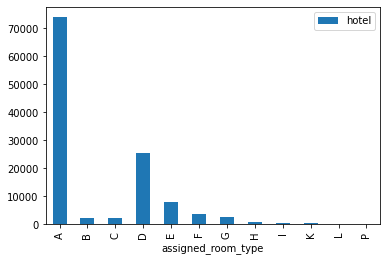

In [6]:
room_type_demand_df.plot(x="assigned_room_type",y=["hotel"],kind="bar")

**Inference:**
we  observe that Room type A is in demand followed by D and L and P are least preferred 

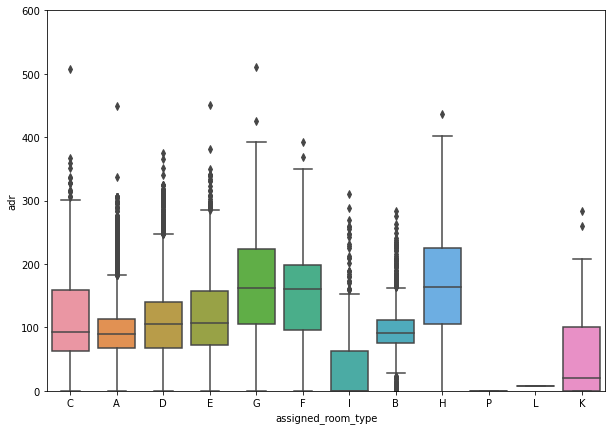

In [32]:
fig = plt.figure(figsize =(10,7))
sns.boxplot( x = df['assigned_room_type'], y = df['adr'])
plt.ylim(0, 600) #To set the range of Y-axis,we use ylim() method.
plt.show()

**Inference:**
we observe that Room type H,G,C are better with respect to adr

In [ ]:
#df.groupby("reserved_room_type")["arrival_date_month"].count().reset_index()
df.groupby("arrival_date_month")["reserved_room_type"].count().reset_index()

# **Which agent made more booking**

In [49]:
df["agent"].replace(np.NaN,0)

0           0.0
1           0.0
2           0.0
3         304.0
4         240.0
          ...  
119385    394.0
119386      9.0
119387      9.0
119388     89.0
119389      9.0
Name: agent, Length: 119390, dtype: float64

In [52]:

agnt_bookng_count=df['agent'].value_counts()
agnt_bookng_count=agnt_bookng_count.reset_index()
agnt_bookng_count.rename(columns = {'index':'agent','agent':'Count'}, inplace = True)
agnt_bookng_count

,agent,Count
0,9.0,31961
1,240.0,13922
2,1.0,7191
3,14.0,3640
4,7.0,3539
...,...,...
328,289.0,1
329,432.0,1
330,265.0,1
331,93.0,1


In [45]:
agnt_vs_booking_df=agnt_bookng_count.sort_values(by="Count",ascending = False)
agnt_vs_booking_df

,agent,Count
0,9.0,31961
1,240.0,13922
2,1.0,7191
3,14.0,3640
4,7.0,3539
...,...,...
302,291.0,1
303,483.0,1
304,197.0,1
305,433.0,1


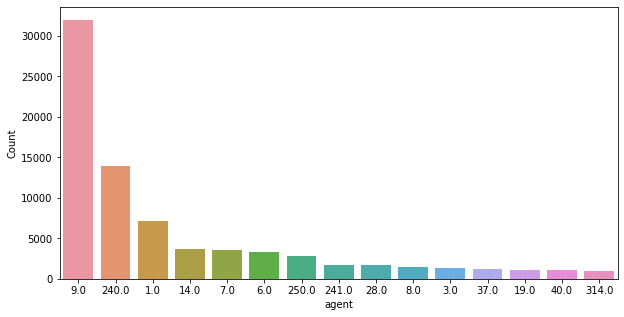

In [46]:
#agnt_vs_booking_df.plot(x="agent",y=["index"],kind="bar")
agnt_vs_booking_df.drop(agnt_vs_booking_df[agnt_vs_booking_df["Count"]==0.0].index,inplace=True)
agnt_vs_booking_df=agnt_vs_booking_df[:15]
plt.figure(figsize = (10,5))
sns.barplot(x = 'agent', y = 'Count',data = agnt_vs_booking_df, order = agnt_vs_booking_df.sort_values('Count', ascending = False).agent)

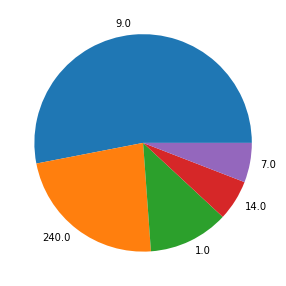

In [57]:
#using Pie chart to represent the top five agents and their booking
plt.figure(figsize = (10,5))
agnt_vs_booking_df=agnt_vs_booking_df[:5]
plt.pie(agnt_vs_booking_df["Count"], labels = agnt_vs_booking_df["agent"])
plt.show()

In [ ]:
list_of_months

In [15]:
agent_vs_month=(df
       .groupby(["agent", "arrival_date_month"])
       .size()
       .reset_index()
       .pivot(columns="arrival_date_month", index="agent")
       )
agent_vs_month.replace(np.NaN,0,inplace=True)

print(agent_vs_month.columns)
agent_vs_month

MultiIndex([(0,     'April'),
            (0,    'August'),
            (0,  'December'),
            (0,  'February'),
            (0,   'January'),
            (0,      'July'),
            (0,      'June'),
            (0,     'March'),
            (0,       'May'),
            (0,  'November'),
            (0,   'October'),
            (0, 'September')],
           names=[None, 'arrival_date_month'])


0                                                   \
arrival_date_month  April  August December February January    July   June   
agent                                                                        
1.0                 339.0  1352.0    257.0    142.0   101.0  1185.0  342.0   
2.0                  45.0    11.0      1.0      9.0     4.0    19.0    9.0   
3.0                 139.0    15.0    120.0     71.0    17.0    14.0  159.0   
4.0                   0.0     0.0      0.0      0.0     0.0     0.0    0.0   
5.0                  12.0    60.0     29.0     12.0     9.0    63.0   47.0   
...                   ...     ...      ...      ...     ...     ...    ...   
510.0                 0.0     0.0      0.0      0.0     2.0     0.0    0.0   
526.0                 3.0     2.0      0.0      0.0     0.0     3.0    1.0   
527.0                35.0     0.0      0.0      0.0     0.0     0.0    0.0   
531.0                 0.0     1.0      0.0      0.0     0.0    32.0   35.0   
535.0                 0.0     0.0      0.0      0.0     0.0     0.0    3.0   

                                                             
arrival_date_month  March    May November October September  
agent                                                        
1.0                 315.0  383.0    235.0   914.0    1626.0  
2.0                   8.0    2.0      4.0    30.0      20.0  
3.0                  39.0  229.0      3.0   304.0     226.0  
4.0                   0.0    0.0      0.0    12.0      35.0  
5.0                   5.0    9.0      1.0    10.0      73.0  
...                   ...    ...      ...     ...       ...  
510.0                 0.0    0.0      0.0     0.0       0.0  
526.0                 0.0    1.0      0.0     0.0       0.0  
527.0                 0.0    0.0      0.0     0.0       0.0  
531.0                 0.0    0.0      0.0     0.0       0.0  
535.0                 0.0    0.0      0.0     0.0       0.0  

[333 rows x 12 columns]

In [ ]:
create a df for top 3 agents and months*********************************************************

# **Which Distribution channel is used most**

In [73]:
channel_vs_count_df=(df["distribution_channel"].value_counts()).reset_index().rename(columns={"index":"Channel","distribution_channel":"Count"})
channel_vs_count_df

,Channel,Count
0,TA/TO,97870
1,Direct,14645
2,Corporate,6677
3,GDS,193
4,Undefined,5


In [ ]:
#finding the percentage 
p=(channel_vs_count_df["Count"]/df.shape[0])*100
channel_vs_count_df["Percentage"]=round(p,2)

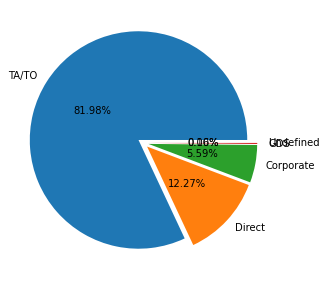

In [82]:
plt.figure(figsize = (10,5))
plt.pie(channel_vs_count_df["Percentage"],autopct="%.2f%%", labels = channel_vs_count_df["Channel"], pctdistance=0.5, explode=[0.05]*5)
plt.show()

does the preference of the distribution channel is effected by hotel type agent or company or country?

In [84]:
df[["distribution_channel","hotel"]]

,distribution_channel,hotel
0,Direct,Resort Hotel
1,Direct,Resort Hotel
2,Direct,Resort Hotel
3,Corporate,Resort Hotel
4,TA/TO,Resort Hotel
...,...,...
119385,TA/TO,City Hotel
119386,TA/TO,City Hotel
119387,TA/TO,City Hotel
119388,TA/TO,City Hotel


In [ ]:
def check_channel_hotel(x,y):
  

In [ ]:
df.groupby(["distribution_channel"]).apply(lambda x:check_channel_hotel(x["distribution_channel"],x["hotel"]),axis=1)